In [1]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Function to embed secret message in image
def encode_message(img, message):
    message += chr(0)  # Null char to indicate end
    binary_msg = ''.join([format(ord(char), '08b') for char in message])
    
    data_index = 0
    binary_len = len(binary_msg)
    
    img_encoded = img.copy()
    
    for row in img_encoded:
        for pixel in row:
            for i in range(3):  # BGR channels
                if data_index < binary_len:
                    new_val = (pixel.item(i) & ~1) | int(binary_msg[data_index])
                    pixel[i] = new_val
                    data_index += 1
                else:
                    break
    return img_encoded

In [3]:
#  Function to decode hidden message from image
def decode_message(img):
    binary_data = ""
    for row in img:
        for pixel in row:
            for i in range(3):
                binary_data += str(pixel[i] & 1)
    
    all_bytes = [binary_data[i:i+8] for i in range(0, len(binary_data), 8)]
    decoded_msg = ""
    
    for byte in all_bytes:
        char = chr(int(byte, 2))
        if char == chr(0):
            break
        decoded_msg += char
    return decoded_msg

In [4]:
#  Load Image
image_path = "C:/Users/kvssb/Downloads/ceeb4046-a227-4c68-a3ca-2a15bd8a4131.jpeg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

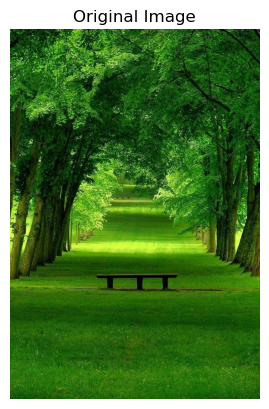

In [5]:
#  Show Original Image
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [7]:
#  Encode the Message
secret_message = "Hello, Cybersecurity!"
encoded_img = encode_message(image, secret_message)

In [8]:
#  Save Encoded Image
cv2.imwrite("C:/Users/kvssb/Downloads/ceeb4046-a227-4c68-a3ca-2a15bd8a4131.jpeg", encoded_img)

True

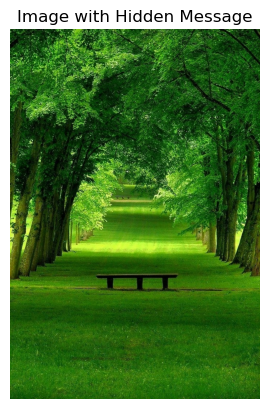

In [9]:
#  Show Encoded Image
encoded_rgb = cv2.cvtColor(encoded_img, cv2.COLOR_BGR2RGB)
plt.imshow(encoded_rgb)
plt.title("Image with Hidden Message")
plt.axis('off')
plt.show()

In [10]:
#  Decode Message from Encoded Image
decoded_msg = decode_message(encoded_img)
print("🔐 Decoded Message:", decoded_msg)

🔐 Decoded Message: Hello, Cybersecurity!
